In [2]:
import scanpy as sc
import yaml

In [20]:
sc.set_figure_params(dpi=80, dpi_save=400, frameon=False, vector_friendly=True)

In [8]:
visium_human_DLPFC =  ["../../data/visium/DLPFC/region_1/151674_labeled.h5ad","../../data/visium/DLPFC/region_1/151675_labeled.h5ad"]
merfish_mouse_hypothalamic =  ["../../data/merfish/hypothalamic/merfish_layer1_labeled.h5ad","../../data/merfish/hypothalamic/merfish_layer2_labeled.h5ad"]
stereo_mouse_embryo =  ["../../data/stereo_seq/counts/E15.5/count_E15.5_E1S1_filter_labeled.h5ad","../../data/stereo_seq/counts/E15.5/count_E15.5_E1S2_filter_labeled.h5ad"]

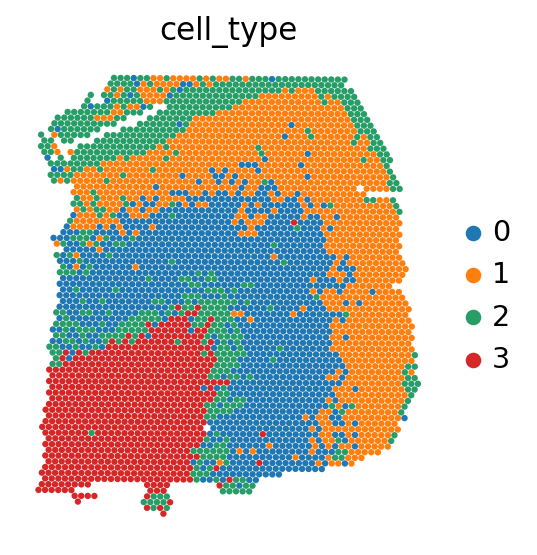

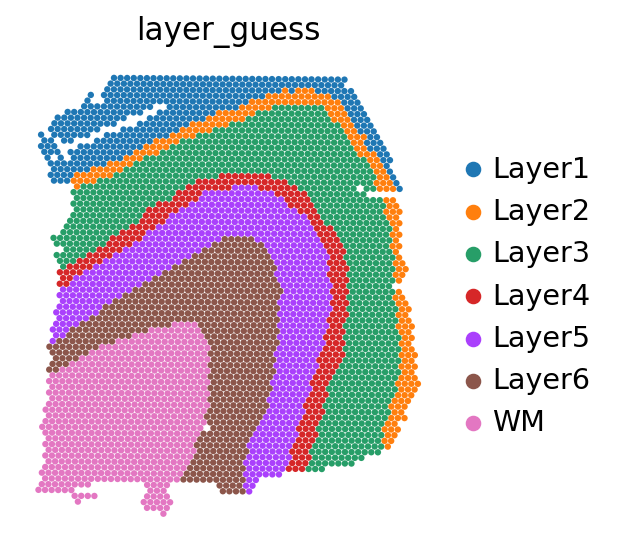

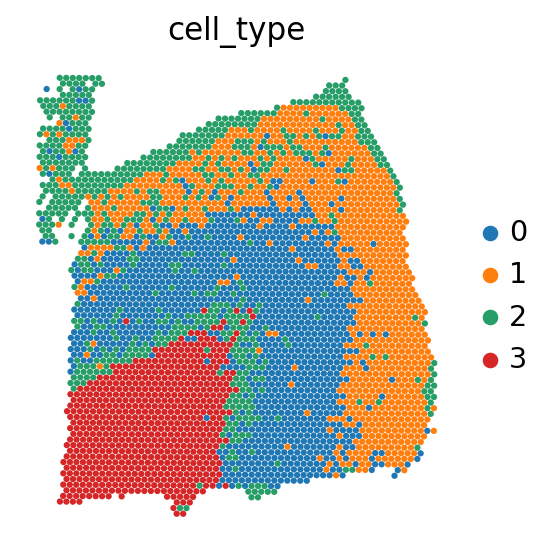

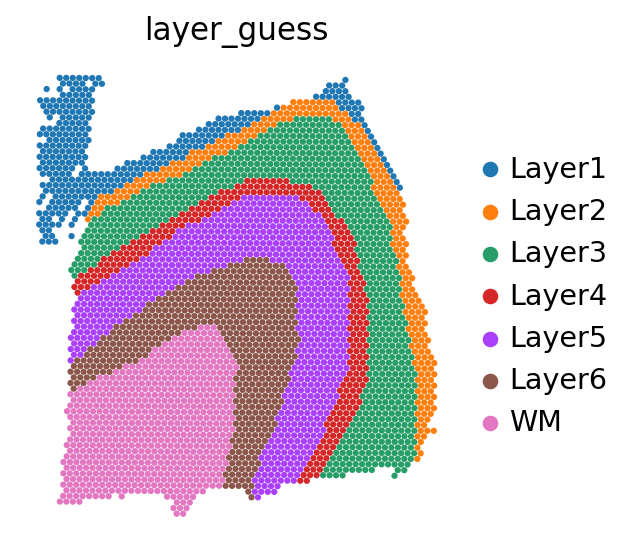

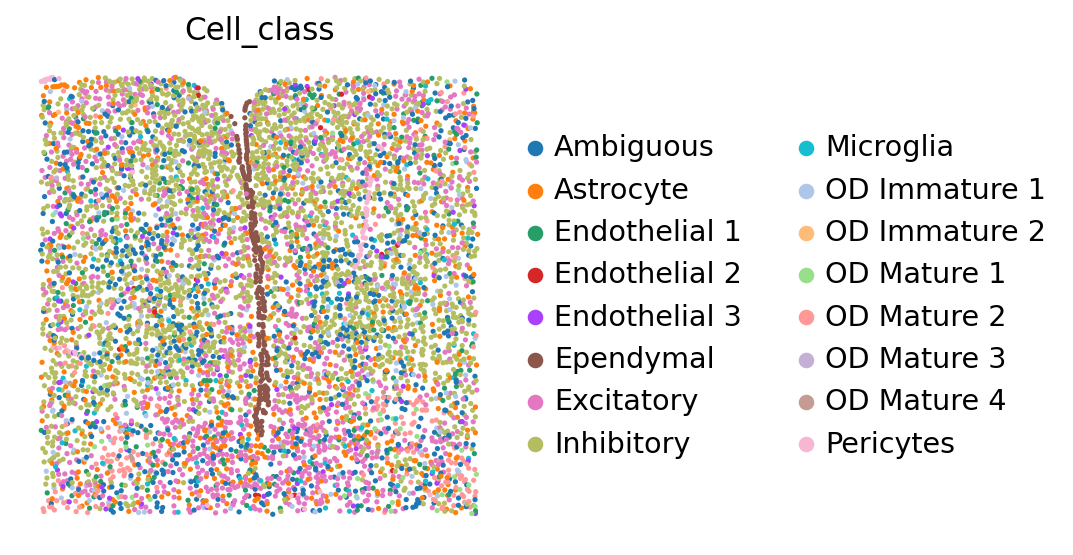

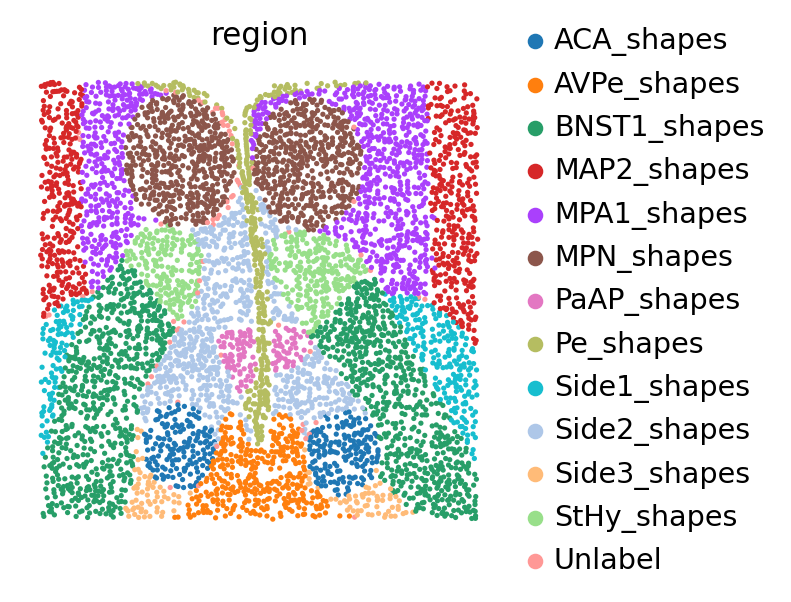

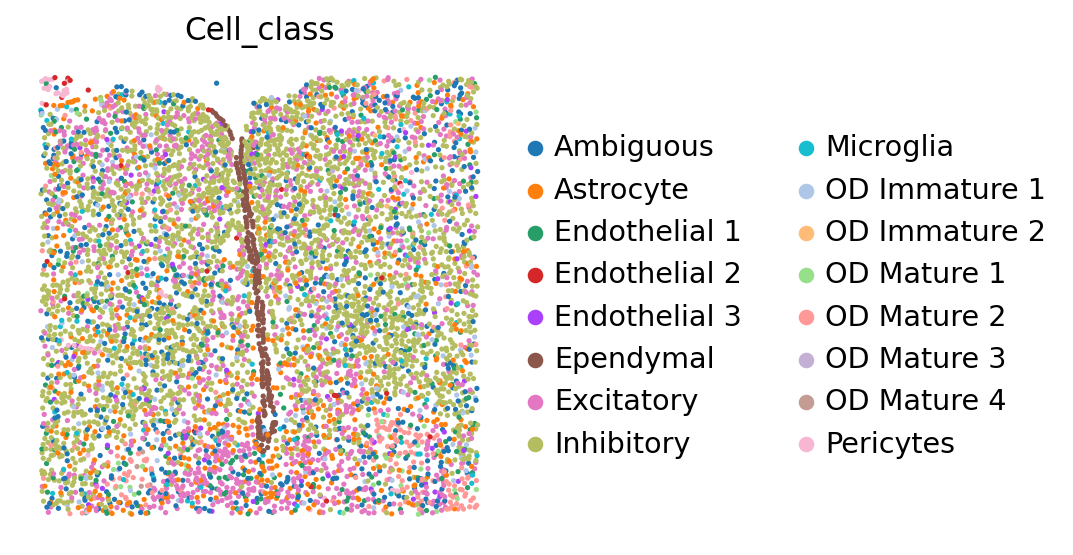

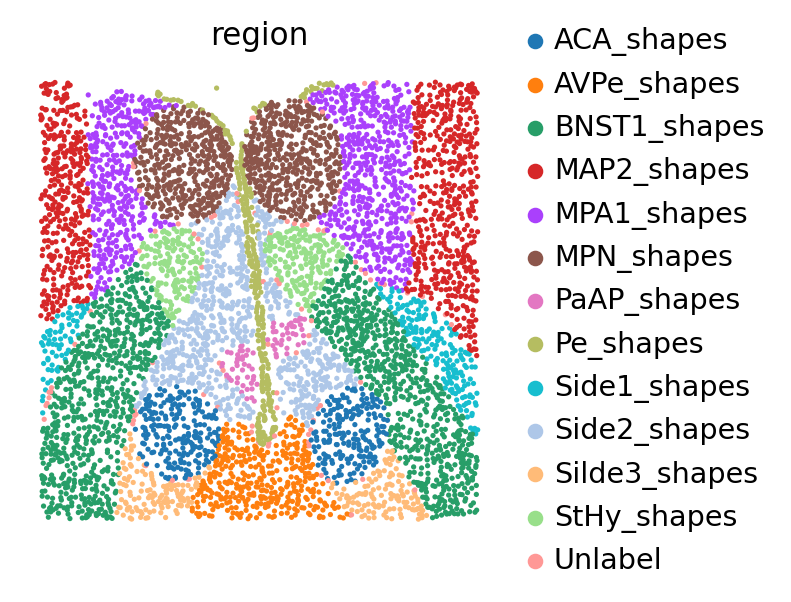

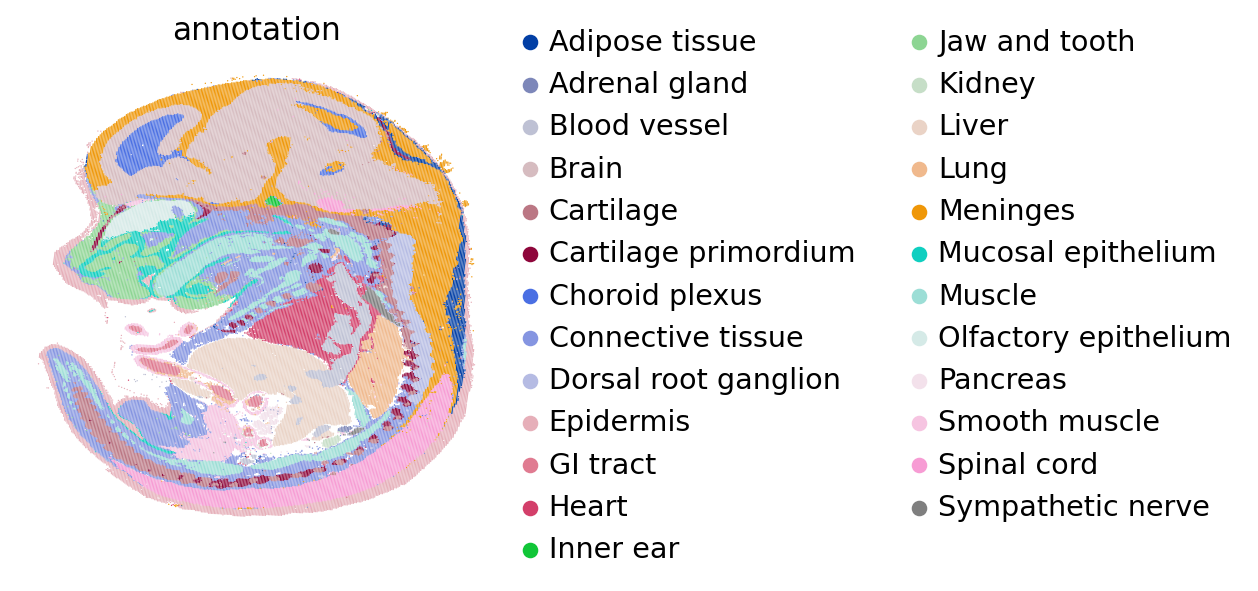

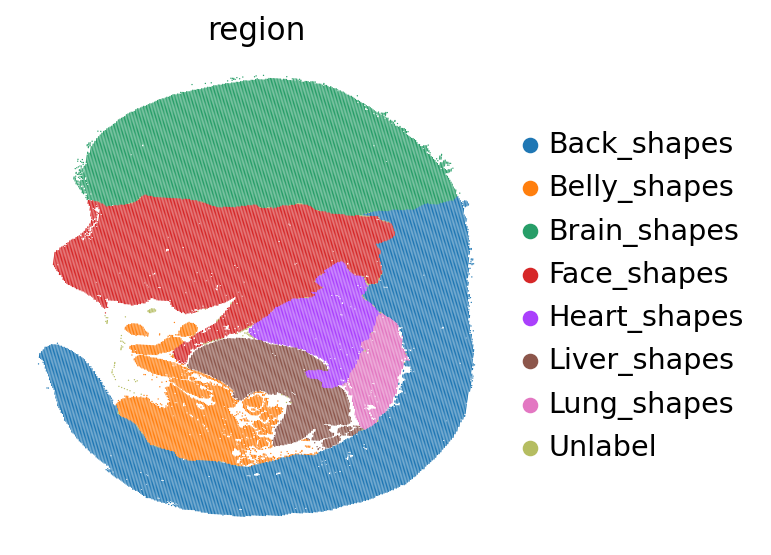

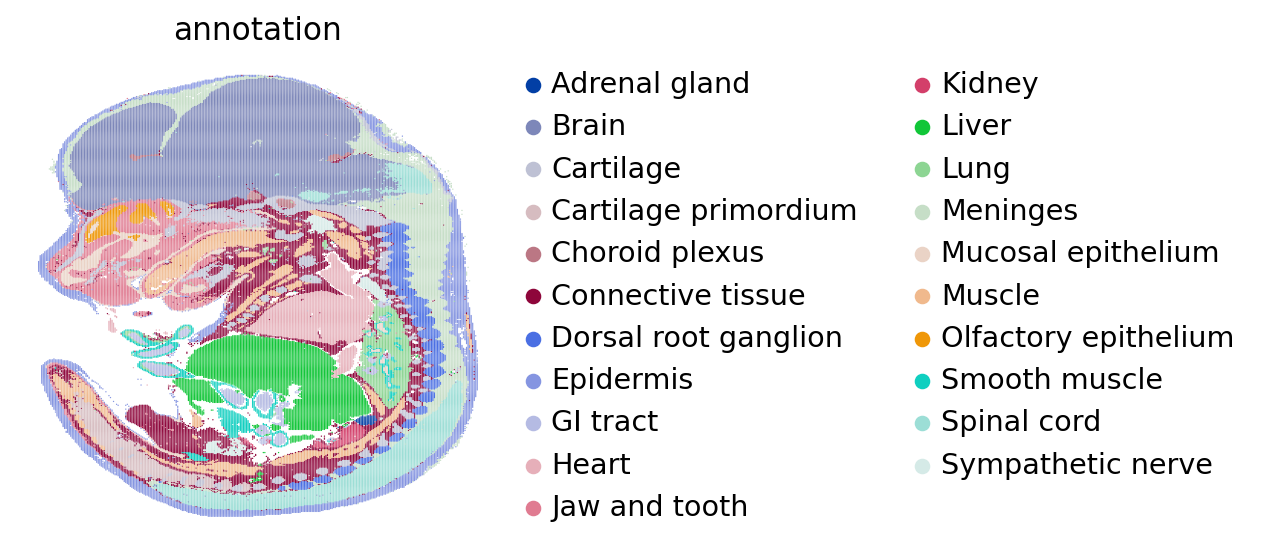

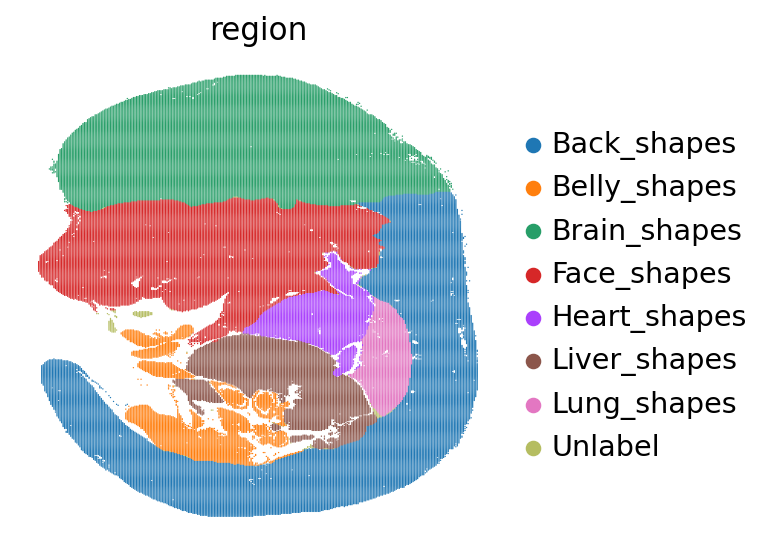

In [25]:
for adata in [visium_human_DLPFC, merfish_mouse_hypothalamic, stereo_mouse_embryo]:
    if 'visium' and 'DLPFC' in adata[0]:
        biology_meta = 'cell_type'
        topology_meta = 'layer_guess'
        spot_size = 6
    elif 'merfish' in adata[0]:
        biology_meta = 'Cell_class'
        topology_meta = 'region'
        spot_size = 12
    elif 'stereo' in adata[0]:
        biology_meta = 'annotation'
        topology_meta = 'region'
        spot_size = 3
    for i in range(len(adata)):
        for meta in [biology_meta, topology_meta]:
            tmp_adata = sc.read(adata[i])
            sc.pl.spatial(tmp_adata, color=meta, spot_size=spot_size, 
                        save=f'_{adata[i].split("/")[-1].split(".h5ad")[0]}_{meta}.png')


In [3]:
# open a yaml file
with open("../config/config.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

In [19]:
# dataset_3d = []
# [dataset_3d.append(i) for i in list(config['dataset_3d'].values())]
flat_list = [item for sublist in list(config['dataset_3d'].values()) for item in sublist]
flat_list = list(set(flat_list))

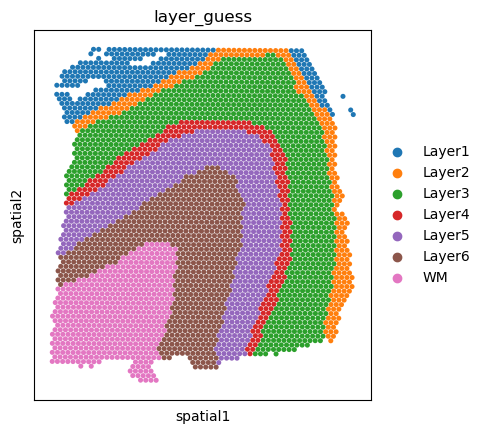

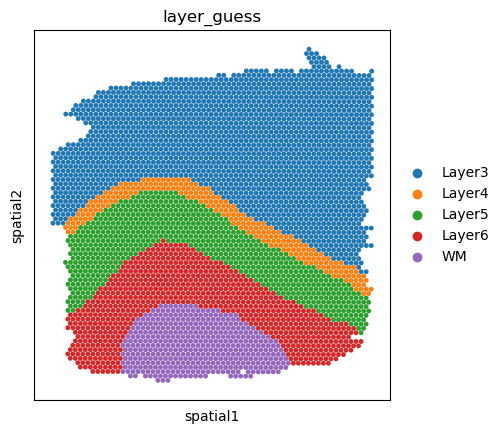

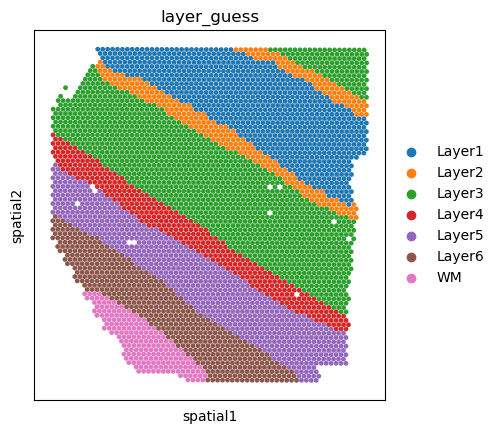

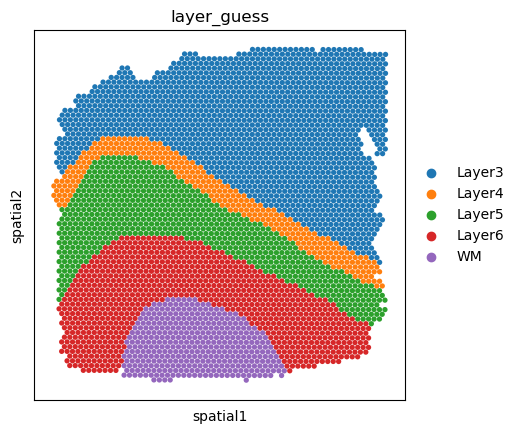

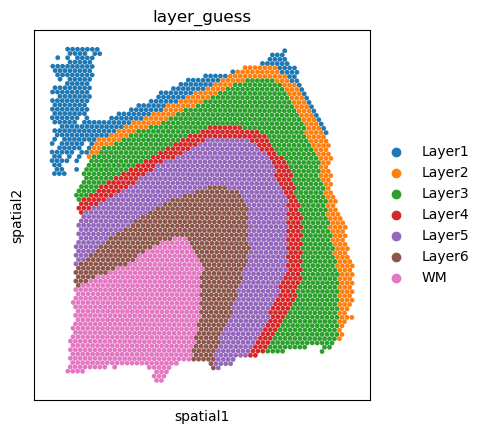

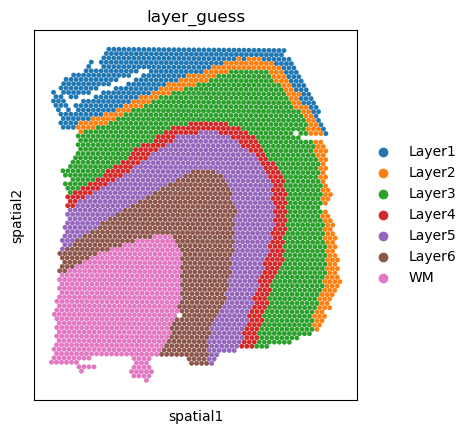

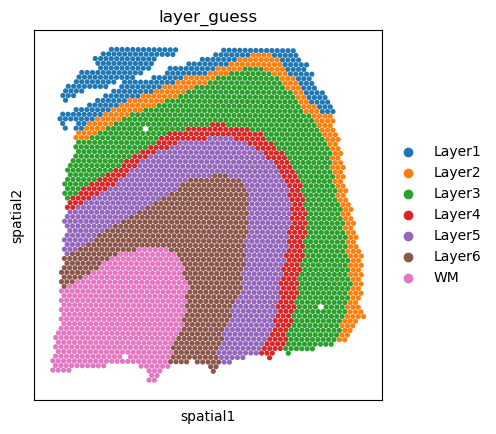

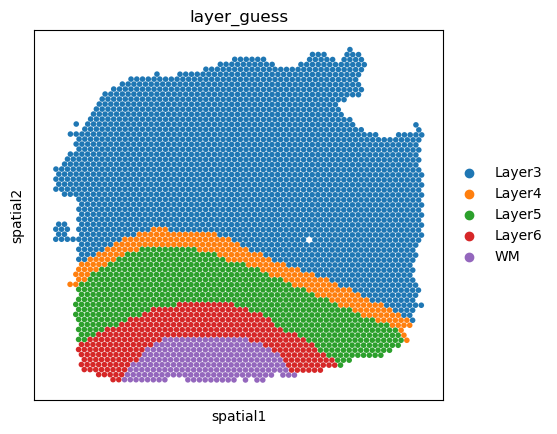

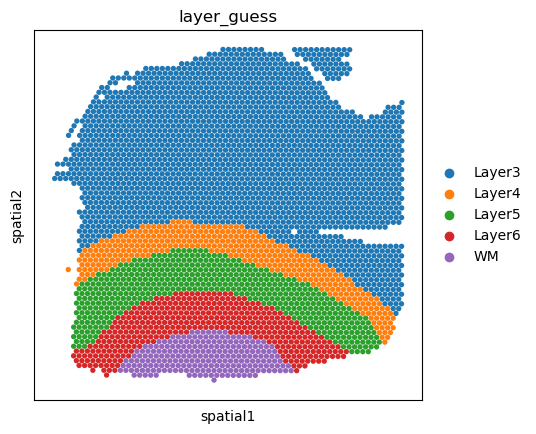

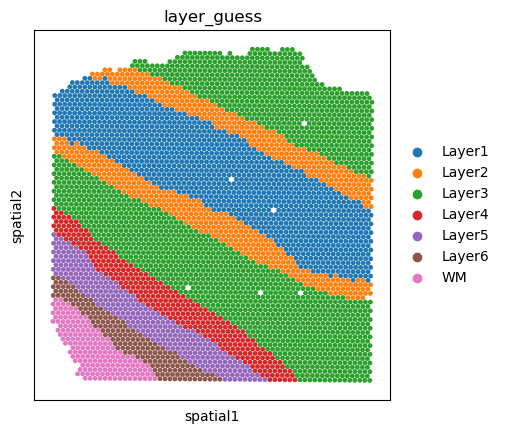

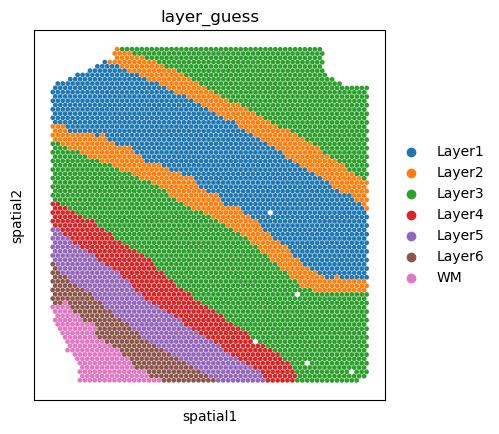

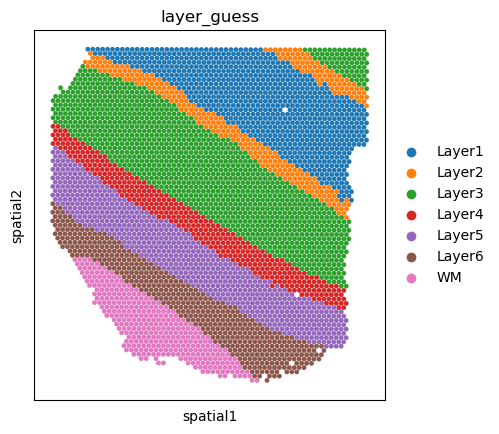

In [24]:
spot_size = 6
for adata in flat_list:
    adata = '../' +  adata
    tmp_adata = sc.read(adata)
    sc.pl.spatial(tmp_adata, color='layer_guess', spot_size=spot_size, 
            save=f'_3D_{adata.split("/")[-1].split(".h5ad")[0]}.png')